# Approch 2 : Fully connected CNN For Lane Detection 

#### Testing the model 

In [38]:
# import the libaries
!pip install scipy==1.1.0
import numpy as np
import cv2,glob,os
import matplotlib.image as mpimg
from scipy.misc import imresize
from moviepy.editor import VideoFileClip
from IPython.display import HTML
import matplotlib.pyplot as plt
from keras.models import model_from_json

RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd

ImportError: initialization failed

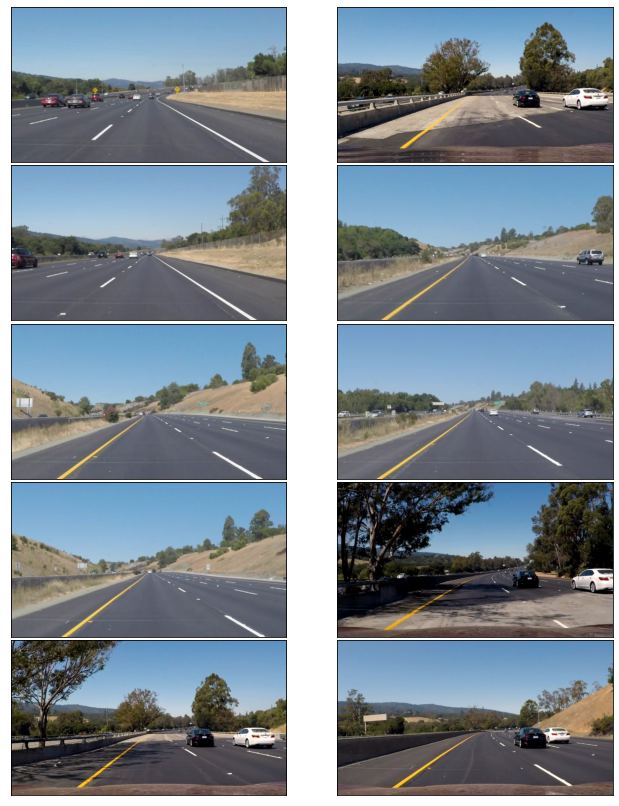

In [30]:
# plot the testing image

# show the images 
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]

show_images(test_images)

In [31]:
# Load pretrained model

# load the model json file 
json_file = open('model.json', 'r')
json_model = json_file.read()
json_file.close()

# load the model from the json
model = model_from_json(json_model)
# load the wieghts of the model
model.load_weights('model.h5')

NameError: name 'model_from_json' is not defined

In [7]:
# create a class Lane 

# Class to average lanes with
class Lanes():
    def __init__(self):
        self.recent_fit = []
        self.avg_fit = []

In [13]:
# resize the image and predict the lane to be drawn from the model in G color

def road_lines_image(image):
    
    img_arr = cv2.imread(image)
    actual_image = imresize(img_arr, (720, 1280, 3))

    # Get image ready for feeding into model
    img = mpimg.imread(image)
    small_img_2 = imresize(img, (80, 160, 3))
    small_img_1= np.array(small_img_2)
    small_img = small_img_1[None, :, :, :]

    # Make prediction with neural network (un-normalize value by multiplying by 255)
    prediction = model.predict(small_img)[0] * 255

    # Add lane prediction to list for averaging
    lanes.recent_fit.append(prediction)
    # Only using last five for average
    if len(lanes.recent_fit) > 5:
        lanes.recent_fit = lanes.recent_fit[1:]

    # Calculate average detection
    lanes.avg_fit = np.mean(np.array([i for i in lanes.recent_fit]), axis = 0)

    # Generate fake R & B color dimensions, stack with G
    blanks = np.zeros_like(lanes.avg_fit).astype(np.uint8)
    lane_drawn = np.dstack((blanks, lanes.avg_fit, blanks))

    # Re-size to match the original image
    lane_image = imresize(lane_drawn, (720, 1280, 3))

    # Merge the lane drawing onto the original image
    result = cv2.addWeighted(actual_image, 1, lane_image, 1, 0)

    return result

In [9]:
# predict the lane detector 

#create a lanes object
lanes = Lanes()

for path in glob.glob('test_images/*.jpg'):
    res_img = road_lines_image(path)
    names = [os.path.basename(x) for x in glob.glob(path)]   
    out_path = 'test_predict/'+names[0]
    # save the result in a image
    cv2.imwrite(out_path,res_img)
   

error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 3
>  - Can't parse 'dsize'. Expected sequence length 2, got 3


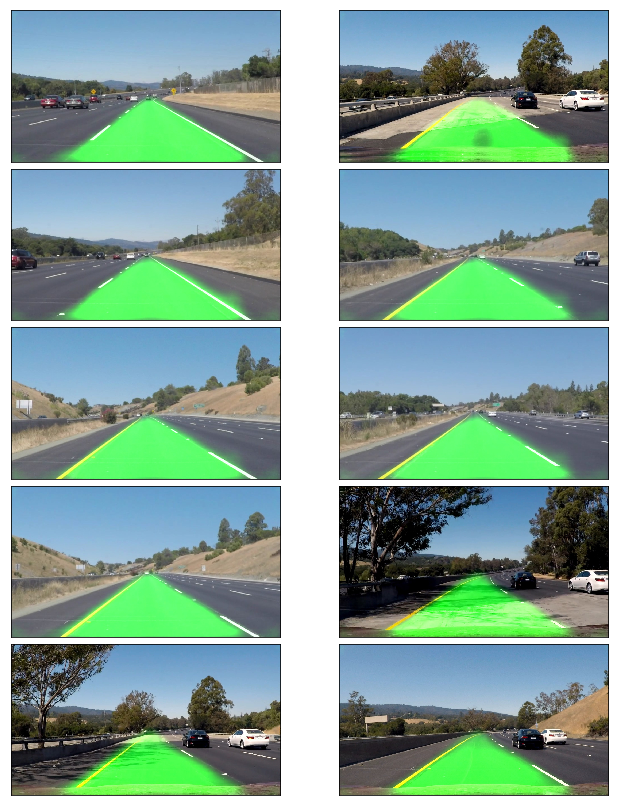

In [14]:
# plot the predicted result

predicted_images = [plt.imread(path) for path in glob.glob('test_predict/*.jpg')]

show_images(predicted_images)